
# An Analysis of the Cab Market 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:

# Extracting datasets
cab_data = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
customers = pd.read_csv('Customer_ID.csv')
transactions = pd.read_csv('Transaction_ID.csv')

In [4]:
transactions_merged = transactions.merge(cab_data, how='inner', on= 'Transaction ID')


# Analyzing City Market Dominance 

We start by analyzing the market dominance of each cab company for each city.

Text(0, 0.5, 'Number of cities with market dominance')

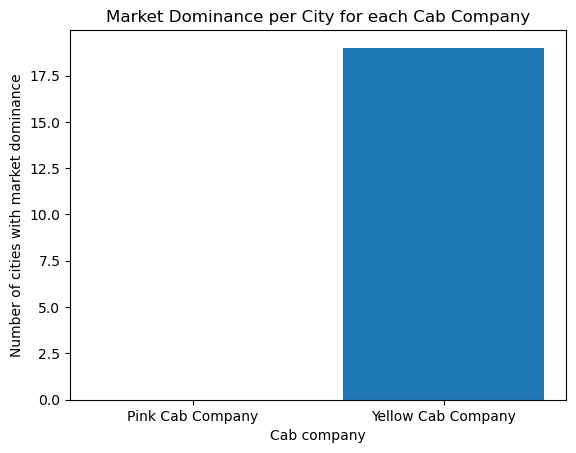

In [3]:
cab_data['Profit'] = cab_data['Price Charged'] - cab_data['Cost of Trip']

city_market_dominance = cab_data.groupby(['Company', 'City']).Profit.sum()

pink_dominant = city_market_dominance['Pink Cab']  > city_market_dominance['Yellow Cab']
yellow_dominant = city_market_dominance['Pink Cab']  < city_market_dominance['Yellow Cab']

plt.bar(['Pink Cab Company','Yellow Cab Company'], [pink_dominant.sum(), yellow_dominant.sum()] )

plt.title('Market Dominance per City for each Cab Company')
plt.xlabel('Cab company')
plt.ylabel('Number of cities with market dominance')

We notice that Yellow Cab Company dominates the market in each city.

# Comparing Total Profits

Here we are comparing the total profits of both companies.

Text(0, 0.5, 'Total profit')

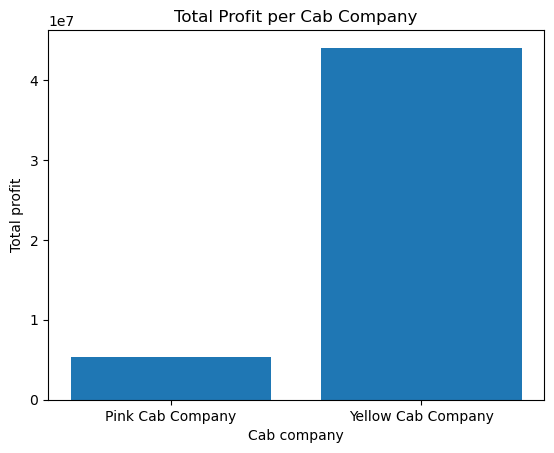

In [5]:
#Total profit amount

tot_profit = cab_data.groupby('Company')['Profit'].sum()

plt.bar(['Pink Cab Company','Yellow Cab Company'], [tot_profit['Pink Cab'],tot_profit['Yellow Cab']] )

plt.title('Total Profit per Cab Company')
plt.xlabel('Cab company')
plt.ylabel('Total profit')

We notice a substantial difference in the total cumulated profit between the two companies in favor of the Yellow Cab Company.

# Time Analysis of Profits

Here we are analyzing the time behaviour of each company's profits.

In [ ]:
main_data = transactions_merged.merge(customers, on = 'Customer ID', how='inner')



Text(0.5, 1.0, 'Profit of each Cab Company in Time')

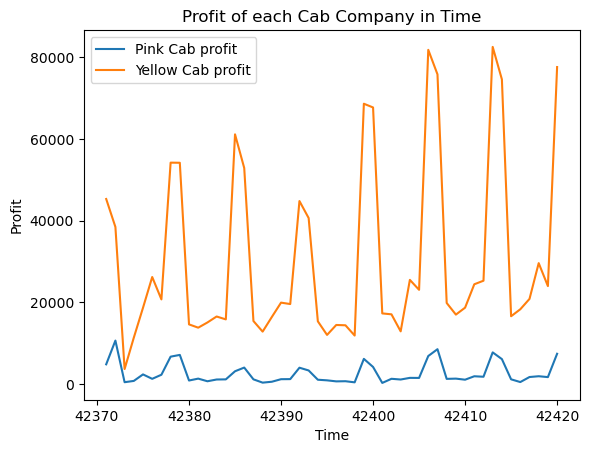

In [7]:
time_data = main_data.groupby(['Company', 'Date of Travel'])['Profit'].sum()

plt.plot(time_data['Pink Cab'].index[0:50], time_data['Pink Cab'][0:50], label='Pink Cab profit')
plt.plot(time_data['Yellow Cab'].index[0:50], time_data['Yellow Cab'][0:50], label='Yellow Cab profit')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Profit')
plt.title('Profit of each Cab Company in Time')


We remark in general higher profits for Yellow Cab. However, Yellow Cab exhibits also more volatility than Pink Cab in their profits.

# Age Demographics Analysis

Here, we are analyzing the age demographic market dominance for each company.

Yellow Cab dominates 48 age groups.
Pink Cab dominates 0 age groups.


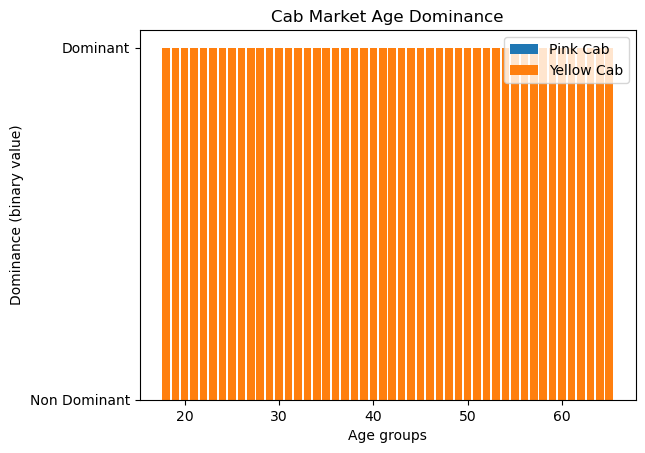

In [72]:
age_demo = pd.Series(dtype=np.int32)
age_demo= main_data.groupby(['Company', 'Age'])['Transaction ID'].count()

pink_dominant = (age_demo.loc['Pink Cab'] > age_demo.loc['Yellow Cab']).astype(int)

yellow_dominant = (age_demo.loc['Pink Cab'] < age_demo.loc['Yellow Cab']).astype(int)

fig, ax = plt.subplots(1,1)

ax.bar(pink_dominant.index, pink_dominant, label= 'Pink Cab')
ax.bar(yellow_dominant.index, yellow_dominant, label= 'Yellow Cab')
ax.legend()
plt.title('Cab Market Age Dominance')
ax.set_xlabel('Age groups')
ax.set_ylabel('Dominance (binary value)')
ax.set_yticks([0,1], ['Non Dominant','Dominant'])
dominant_count_yellow = np.sum(yellow_dominant)
dominant_count_pink = np.sum(pink_dominant)

print(f'Yellow Cab dominates {dominant_count_yellow} age groups.')
print(f'Pink Cab dominates {dominant_count_pink} age groups.')

# Customer Income Analysis

Here, we look at the financial profile of the customers of each company.

In [ ]:
main_data['High Social Status'] = main_data['Income (USD/Month)'] > 15000


Text(0, 0.5, 'Number of Transactions')

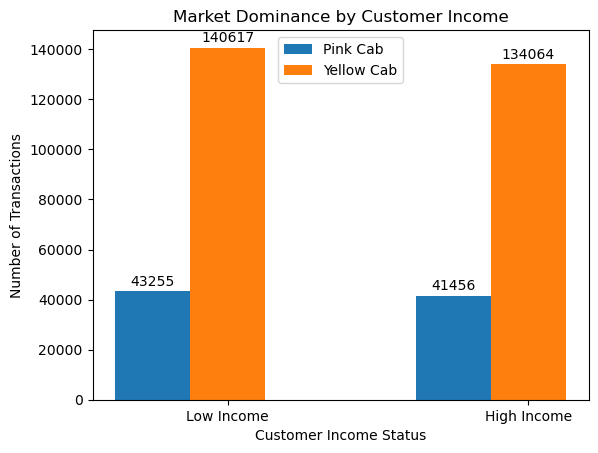

In [73]:
main_data['High Social Status'] = main_data['High Social Status'].astype(np.int8)
social_status = main_data.groupby(['Company', 'High Social Status'])['Transaction ID'].count()

x = np.arange(2)
width = 0.25 
multiplier = 0 

fig, ax = plt.subplots(1,1)

for company in ['Pink Cab', 'Yellow Cab']:
    rects = ax.bar(x + multiplier*width, social_status[company] ,width, label= company)
    ax.bar_label(rects, padding=2)
    multiplier+=1

ax.set_xticks(x+width,['Low Income', 'High Income'] )
ax.legend(loc='upper center')
plt.title('Market Dominance by Customer Income')

ax.set_xlabel('Customer Income Status')
ax.set_ylabel('Number of Transactions')

In [78]:
ratio = main_data.groupby('Company')['Transaction ID'].count()[1]/main_data.groupby('Company')['Transaction ID'].count()[0]

print(f"Yellow Cab is around {int(ratio)} times bigger than Pink Cab in terms of transactions")

Yellow Cab is around 3 times bigger than Pink Cab in terms of transactions


# Conclusion

Yellow Cab company dominates the figures in all the sections. Even while taking in account the potential difference of size of the companies using the number of transactions, the Yellow Cab company still has in general higher figures. The only potential drawback of Yellow Cab is in the high volatility of its profits. Indeed, it is recommended to take a look at Yellow Cab's supplier reliability in terms of pricing and investigate in these areas.